In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")

In [3]:
from plot_image import plot_set_images
from plot_image import plot_orinale_image_with_prediction
from extract_prostate_region import extract_prostate_region
from extract_prostate_region import extract_prostate_region_validation
from feature_eng import feature_eng
from outlier_detection import outliers_clean_resampling
from outlier_detection import plot_outliers
from outlier_detection import check_resultofdropping
from outlier_detection import outliers_clean_resampling_group

In [4]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)

In [5]:
data=dataset["dataset"]
type(data)

numpy.ndarray

In [6]:
for i in range(len(data)):
    print(data[i][0][0][0][0][:,:,:,1].shape)

(34, 41, 31)
(80, 82, 82)
(82, 74, 80)
(89, 102, 85)
(66, 78, 62)
(69, 83, 66)
(50, 57, 48)
(55, 69, 54)
(64, 65, 63)
(99, 83, 80)
(107, 99, 85)
(320, 320, 39)
(320, 320, 43)
(320, 320, 39)


In [7]:
sum = 0
for i in range (len(data)):
    sum = sum + data[i][0][0][0][0].size
sum    

85436685

# visualization #

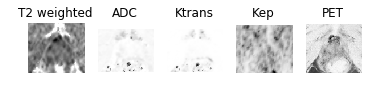

In [8]:
stuck,slice = 3,23
plot_set_images(data,stuck,slice)

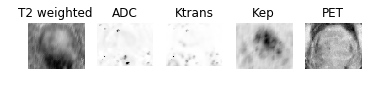

In [9]:
stuck,slice = 7,23
plot_set_images(data,stuck,slice)

The meaning of index:
<br>
index 1 stands for the prediction of doctoe A
<br>
index 2 stands for the prediction of doctoe B
<br>
for stuck numbered between 10 and 13, index 3 stands for the precision prediction 

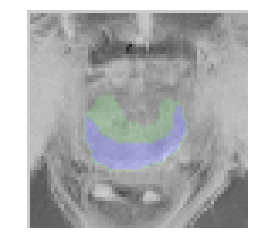

In [10]:
stuck,slices,index,features=8,24,1,4
plot_orinale_image_with_prediction(data,stuck,index,slices,features)

# extract_prostate_region #

There are two choice of data_stuck_num: 11,14
<br>
In this experiment, we use the mapping defined on script for traing data.
<br>
There is another function below:extract_prostate_region_validation. In this fuction, we use the ground truth.

In [11]:
data_stuck_num=11
train_feature,train_label = extract_prostate_region(data,data_stuck_num)

In [12]:
len(train_feature)

355455

### extract the labels of expert ###

In [7]:
data_stuck_num=14
train_feature_total,train_label_total = extract_prostate_region(data,data_stuck_num)

In [16]:
validation_label_expert=train_label_total[train_label_total['source_of_pixel']>10]

In [20]:
validation_feature_expert=train_feature_total[train_label_total['source_of_pixel']>10]

In [22]:
len(validation_label_expert)

65832

### extract his labels ###

In [9]:
validation_label,validation_feature=extract_prostate_region_validation(data)

In [10]:
len(validation_label)

70027

### extract those features expert A and expert B labels differently ###

In [6]:
data_stuck_num=11
train_feature_with_uncertain,train_label_with_uncertain = extract_prostate_region(data,data_stuck_num)

In [7]:
len(train_label_with_uncertain[train_label_with_uncertain['label']==1.5])

27323

In [12]:
#train_feature.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_feature.csv",index=True)
#train_label.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv",index=True)
validation_feature.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_feature.csv",index=True)
validation_label.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv",index=True)

In [23]:
validation_label_expert.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label_expert.csv",index=True)
validation_feature_expert.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_feature_expert.csv",index=True)

In [13]:
train_feature_with_uncertain.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_feature_with_uncertain.csv",index=True)
train_label_with_uncertain.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label_with_uncertain.csv",index=True)

# Normalization #

  construct the whole pipeline of the features enginerring
- Transform the first feature TR wighted
- normalize all the features

In [31]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")

In [27]:
validation_label_expert=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label_expert.csv")
validation_feature_expert=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_feature_expert.csv")

In [32]:
X_train_scaled=feature_eng.fit_transform(X_train.drop('Unnamed: 0',1))

In [33]:
X_val_scaled=feature_eng.transform(X_val.drop('Unnamed: 0',1))

In [34]:
X_val_expert = feature_eng.transform(validation_feature_expert.drop('Unnamed: 0',1))

In [35]:
X_val_scaled.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv",index=True)
X_train_scaled.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv",index=False)

In [36]:
X_val_expert.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature_expert.csv",index=True)

In [22]:
X_val_scaled[:10]

,feature0,feature1,feature2,feature3,feature4
0,1.496713,-0.508974,-0.266269,-0.708827,0.480083
1,1.493759,-0.549401,-0.243492,-0.774610,0.952082
2,0.229118,-0.260003,-0.285134,-0.441109,2.077617
3,0.558443,-0.086173,-0.267538,-0.495074,0.719713
4,0.833441,0.024761,-0.256189,-0.540253,-0.100838
5,1.140704,-0.006060,-0.250115,-0.581308,0.654360
6,1.464060,-0.016312,-0.236356,-0.624755,1.358727
7,1.662426,-0.096102,-0.216974,-0.682210,2.244632
8,1.683592,-0.201589,-0.201712,-0.750188,2.847339
9,2.002994,-0.292518,-0.185280,-0.807845,3.159584


# Outlier detection #

In [11]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")

In [ ]:
X_train[]

In [14]:
X_train[y_train['source_of_pixel']==6]

,feature0,feature1,feature2,feature3,feature4
215317,-1.965785,-0.345815,-0.308827,-0.872434,-1.032579
215318,-1.662034,-0.405030,-0.317558,-0.893661,-0.878787
215319,-1.501129,-0.480548,-0.325661,-0.869750,-0.559978
215320,-1.251740,-0.518915,-0.330481,-0.724738,-0.436595
215321,-0.966999,-0.536248,-0.332127,-0.565045,0.031633
215322,-3.319129,-0.158468,-0.291776,-0.813686,-2.014904
215323,-2.672765,-0.179980,-0.291256,-0.772547,-1.572296
215324,-2.177012,-0.184030,-0.293416,-0.741740,-1.140257
215325,-1.884171,-0.214350,-0.301578,-0.762967,-0.918242
215326,-1.497315,-0.272529,-0.313295,-0.839738,-0.738830


In [5]:
X_data_after_detection,y_data_after_detection,y_dropped,robust_dis=outliers_clean_resampling(p_free=5,n_subsamples=253,labels=y_train).fit_transform(X_train)

drop count: 13025


In [6]:
X_data_after_detection_grouped,y_data_after_detection_grouped,y_dropped_grouped,robust_dis_grouped=outliers_clean_resampling_group(X_train,y_train,11)

current executing data stuck: 0
drop count: 24
            
current executing data stuck: 1
drop count: 4902
            
current executing data stuck: 2
drop count: 2176
            
current executing data stuck: 3
drop count: 2877
            
current executing data stuck: 4
drop count: 120
            
current executing data stuck: 5
drop count: 66
            
current executing data stuck: 6
drop count: 24200
            
current executing data stuck: 7
drop count: 3434
            
current executing data stuck: 8
drop count: 82
            
current executing data stuck: 9
drop count: 5495
            
current executing data stuck: 10
drop count: 2285
            


In [9]:
robust_dis_grouped[robust_dis_grouped['source_of_pixel']==7]['robust_dis']

239517     7.504299
239518     7.191950
239519     6.722996
239520     7.311693
239521     8.973485
239522     9.055230
239523     5.992153
239524     7.750421
239525     8.008647
239526     7.980550
239527    10.365944
239528     9.850014
239529    11.001059
239530    11.647526
239531    10.528532
239532     9.872683
239533     8.329067
239534     9.102217
239535     9.263633
239536     4.039925
239537     3.594524
239538     6.296998
239539     6.290635
239540     6.564289
239541     6.202839
239542     6.735137
239543     7.813241
239544     8.066417
239545     8.449762
239546     9.861026
            ...    
262605     6.276345
262606     5.641558
262607     6.276242
262608     6.719896
262609     6.264250
262610     7.139086
262611     3.684702
262612     2.126259
262613     4.171163
262614     3.284705
262615     2.464889
262616     2.293932
262617     2.871014
262618     5.081200
262619     5.708726
262620     4.255832
262621     5.647701
262622     5.528205
262623     6.178375


In [45]:
robust_dis_grouped.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis_grouped.csv",index=True)
robust_dis.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis.csv",index=True)

In [5]:
robust_dis_grouped=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis_grouped.csv")
robust_dis=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\robust_dis.csv")

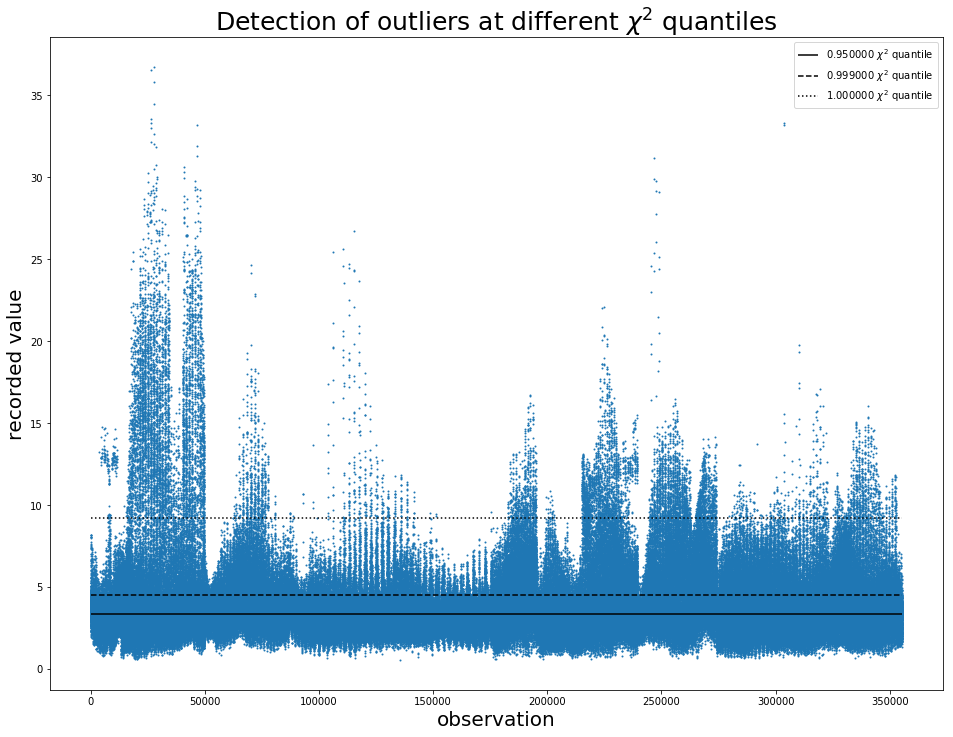

In [8]:
plot_outliers(robust_dis,0.95,0.999,0.99999999999999994375)

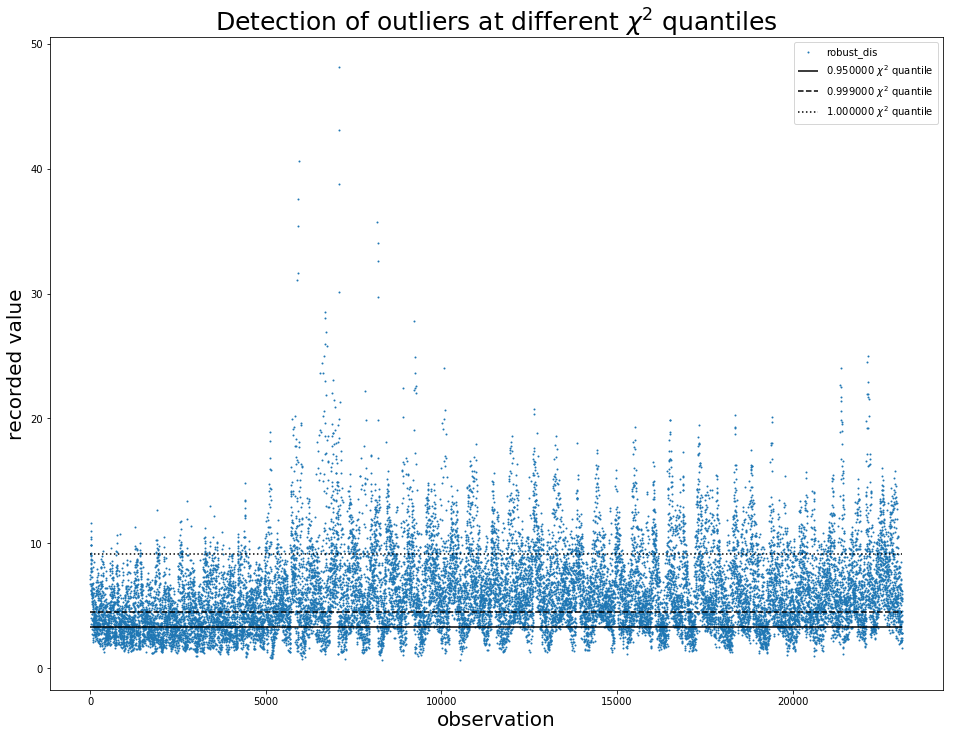

In [38]:
plot_outliers(robust_dis_grouped[robust_dis_grouped['source_of_pixel']==7]['robust_dis'],0.95,0.999,0.9999999999999999444888487)

In [33]:
len(X_train)

355455

In [34]:
len(X_data_after_detection_grouped)

309794

In [35]:
len(X_data_after_detection)

342430

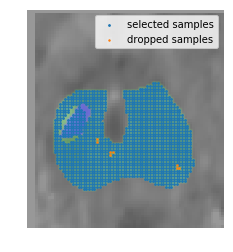

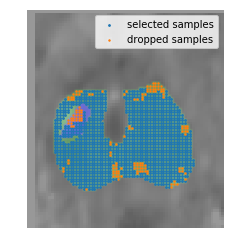

In [39]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
stuck,slices,index,features=2,34,1,0
check_resultofdropping(data,stuck,index,slices,features,y_data_after_detection,y_dropped)
check_resultofdropping(data,stuck,index,slices,features,y_data_after_detection_grouped,y_dropped_grouped)

In [43]:
X_data_after_detection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_train_after_detection.csv",index=True)
y_data_after_detection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_train_after_detection.csv",index=True)

In [44]:
X_data_after_detection_grouped.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_train_after_detection_grouped.csv",index=True)
y_data_after_detection_grouped.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_train_after_detection_grouped.csv",index=True)

This is a wrong example which we did before. As it is shown, there are lots of points which are less likely to be wrong labeled dropped. We guess it is simply because that the features can have large variance although they are in the same cancer or non-cancer region.

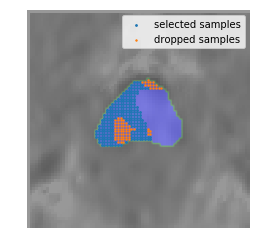

In [13]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
stuck,slices,index,features=1,25,1,0
check_resultofdropping(data,stuck,index,slices,features,y_data_after_detection,y_dropped)

## Training set selection##

In [58]:
from training_set_selection import training_set_selection_miniBatch_kmeans
from training_set_selection import check_result_after_selection
from training_set_selection import training_set_selection_FCNN
from training_set_selection import training_set_selection_CNN
from sklearn.cluster import MiniBatchKMeans

In [49]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")

In [54]:
y_train=y_train. drop("Unnamed: 0",1)
y_val=y_val. drop("Unnamed: 0",1)
X_val=X_val. drop("Unnamed: 0",1)

In [59]:
#apply the function with 30 samples in one cluster
X_after_kMeans_trainin_set_selection,y_after_kMeans_trainin_set_selection,center=training_set_selection_miniBatch_kmeans(labels=y_train,kmeans=MiniBatchKMeans(n_clusters=np.int((X_train.shape[0])/50),\
                                                                  n_init=1,max_iter=100,\
                                                                  init_size=3*np.int((X_train.shape[0])/50),verbose=-1,\
                                                                  random_state=42)).fit_transform(X_train)

fit start
Init 1/1 with method: k-means++
Inertia for init 1/1: 859.831530
Minibatch iteration 1/355500: mean batch inertia: 0.080423, ewa inertia: 0.080423 
Minibatch iteration 2/355500: mean batch inertia: 0.075163, ewa inertia: 0.080420 
Minibatch iteration 3/355500: mean batch inertia: 0.056506, ewa inertia: 0.080406 
Minibatch iteration 4/355500: mean batch inertia: 0.086410, ewa inertia: 0.080410 
Minibatch iteration 5/355500: mean batch inertia: 0.062057, ewa inertia: 0.080399 
Minibatch iteration 6/355500: mean batch inertia: 0.095525, ewa inertia: 0.080408 
Minibatch iteration 7/355500: mean batch inertia: 0.091391, ewa inertia: 0.080414 
Minibatch iteration 8/355500: mean batch inertia: 0.071553, ewa inertia: 0.080409 
Minibatch iteration 9/355500: mean batch inertia: 0.077429, ewa inertia: 0.080407 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 10/355500: mean batch inertia: 0.083162, ewa inertia: 0.080409 
Minibatch iteration 11/355500: mean batch in

Minibatch iteration 93/355500: mean batch inertia: 0.065887, ewa inertia: 0.080096 
Minibatch iteration 94/355500: mean batch inertia: 0.060490, ewa inertia: 0.080085 
Minibatch iteration 95/355500: mean batch inertia: 0.061274, ewa inertia: 0.080075 
Minibatch iteration 96/355500: mean batch inertia: 0.069516, ewa inertia: 0.080069 
Minibatch iteration 97/355500: mean batch inertia: 0.098173, ewa inertia: 0.080079 
Minibatch iteration 98/355500: mean batch inertia: 0.074694, ewa inertia: 0.080076 
Minibatch iteration 99/355500: mean batch inertia: 0.082289, ewa inertia: 0.080077 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 100/355500: mean batch inertia: 0.056856, ewa inertia: 0.080064 
Minibatch iteration 101/355500: mean batch inertia: 0.068959, ewa inertia: 0.080058 
Minibatch iteration 102/355500: mean batch inertia: 0.074499, ewa inertia: 0.080055 
Minibatch iteration 103/355500: mean batch inertia: 0.065274, ewa inertia: 0.080047 
Minibatch iteration 10

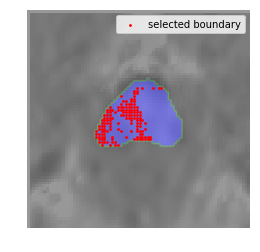

In [60]:
dataset = loadmat ("D:\\lab_signal_processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data = dataset ["dataset"]
stuck,slices,index,features=1,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_kMeans_trainin_set_selection)

In [61]:
X_after_FCNN,y_after_FCNN=training_set_selection_FCNN(X_train,y_train)

The tatal amount of data slices: 36
                           
current data slice:0
current count:26 current size of store:2464 time:  0.8 minute
current data slice:1
current count:27 current size of store:2444 time:  0.8 minute
current data slice:2
current count:28 current size of store:2516 time:  0.9 minute
current data slice:3
current count:24 current size of store:2595 time:  0.7 minute
current data slice:4
current count:28 current size of store:2563 time:  0.8 minute
current data slice:5
current count:25 current size of store:2515 time:  0.8 minute
current data slice:6
current count:27 current size of store:2557 time:  0.8 minute
current data slice:7
current count:25 current size of store:2444 time:  0.8 minute
current data slice:8
current count:28 current size of store:2519 time:  0.9 minute
current data slice:9
current count:28 current size of store:2504 time:  0.8 minute
current data slice:10
current count:32 current size of store:2615 time:  0.9 minute
current data slice:11


In [62]:
len(y_after_FCNN)

89524

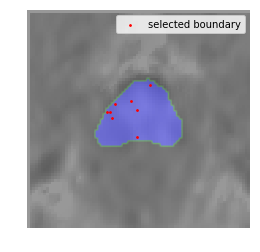

In [63]:
stuck,slices,index,features=1,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_FCNN)

In [64]:
X_after_CNN,y_after_CNN=training_set_selection_CNN(X_train,y_train)

The tatal amount of data slices: 36
                           
current data slice:0
During this iteratiron, 7602 data is discarded
this interation costs time:  0.8 minute
              
current data slice:1
During this iteratiron, 7580 data is discarded
this interation costs time:  0.9 minute
              
current data slice:2
During this iteratiron, 7485 data is discarded
this interation costs time:  0.9 minute
              
current data slice:3
During this iteratiron, 7417 data is discarded
this interation costs time:  0.9 minute
              
current data slice:4
During this iteratiron, 7581 data is discarded
this interation costs time:  0.9 minute
              
current data slice:5
During this iteratiron, 7642 data is discarded
this interation costs time:  0.9 minute
              
current data slice:6
During this iteratiron, 7451 data is discarded
this interation costs time:  0.9 minute
              
current data slice:7
During this iteratiron, 7448 data is discarded
this in

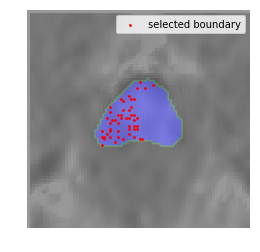

In [65]:
stuck,slices,index,features=1,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_CNN)

In [66]:
len(y_after_CNN)

86412

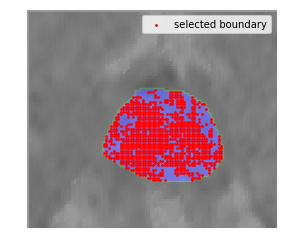

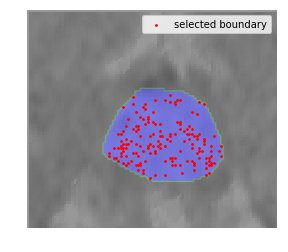

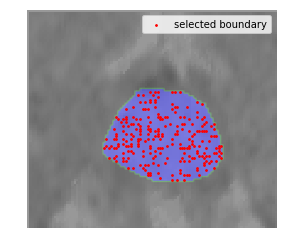

In [67]:
stuck,slices,index,features=3,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_kMeans_trainin_set_selection)
check_result_after_selection(data,stuck,index,slices,features,y_after_FCNN)
check_result_after_selection(data,stuck,index,slices,features,y_after_CNN)

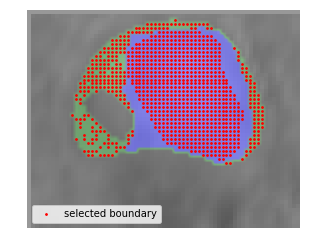

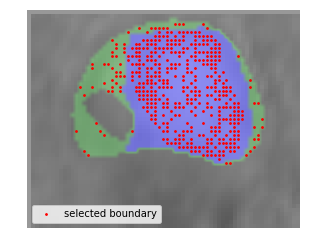

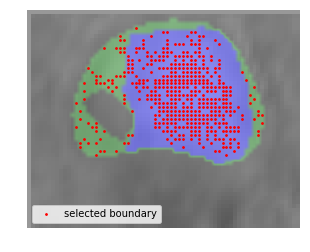

In [71]:
stuck,slices,index,features=7,25,1,0
check_result_after_selection(data,stuck,index,slices,features,y_after_kMeans_trainin_set_selection)
check_result_after_selection(data,stuck,index,slices,features,y_after_FCNN)
check_result_after_selection(data,stuck,index,slices,features,y_after_CNN)

In [72]:
X_after_FCNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv",index=False)
y_after_FCNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv",index=False)
X_after_kMeans_trainin_set_selection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv",index=False)
y_after_kMeans_trainin_set_selection.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv",index=False)
X_after_CNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv",index=False)
y_after_CNN.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv",index=False)